In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as st


%matplotlib inline


In [2]:


def bernoulli_random_walk(p = 0.5, a = 1, b = 0):
    start = 0

    while True:
        yield start
        if random.random() > p:
            start += a
        else:
            start += b


def normal_random_walk(init = 1, mean = 0.001, sd = 0.001):
    value = init

    while True:
        yield value

        value *= (np.random.normal(mean, sd) + 1)

def take(gen, n):
    it = iter(gen)
    out = []
    for i in range(n):
        out.append(next(it))

    return out


In [29]:

def graph_random_walk(wk, n = 10, m = 1000, *args, **kwargs):
    xs = np.arange(m)

    for i in range(n):
        ys = take(wk(*args, **kwargs), m)
        plt.plot(xs, ys)

    plt.show()
    
    # a = -1
    # b = 2
    # p = 0.25
    # lowerbound = 0 + xs * (b * p + (1-p) * a) - 3 * np.sqrt(xs * (b-a)**2 * p * (1-p))
    # upperbound = 0 + xs * (b * p + (1-p) * a) + 3 * np.sqrt(xs * (b-a)**2 * p * (1-p))

    # plt.plot(xs, lowerbound)
    # plt.plot(xs, upperbound)


def graph_distribution(wk, n=1000, m=1000, width=0.5, *args, **kwargs):
    ys = []

    for _ in range(n):
        ys.append(take(wk(*args, **kwargs), m)[-1])

    plt.hist(ys, bins=np.arange(min(ys), max(ys) + width, width), density=True)
    plt.show()


def mean_random_walk(wk, n = 100, m = 100, *args, **kwargs):
    total = []
    for i in range(n):
        value = take(wk(*args, **kwargs), m)[-1]
        total.append(value)

    return sum(total)/n

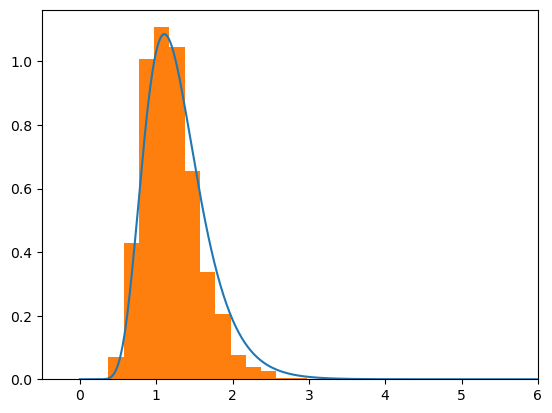

In [28]:
# graph_random_walk(normal_random_walk, n=50, sd=0.01)

# graph expected outcome
i = 1
t = 10
mean = 0.02
sd = 0.1


xs = np.arange(0, 6, 0.01)
ys = st.lognorm.pdf(xs, scale=np.exp(t*mean)*i, s=np.sqrt(t)*sd)
plt.plot(xs, ys)
plt.xlim(-0.5, 6)


# m = 50
# mean = (1+mean)**(1/m)-1
# sd = sd / np.sqrt(m)
# t = t * m
graph_distribution(normal_random_walk, n=2000, m=t, sd=sd, mean=mean, init=i, width=0.2)

In [43]:
mean_random_walk(normal_random_walk, mean=0.02, sd=0.1, m=10, n=10000)

1.1981812659668218